In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# train, test i valid su nam dati
train_X = pd.read_csv("../ip_timeseries/train_timeseries.csv")

In [54]:
test_X = pd.read_csv("../ip_timeseries/test_timeseries.csv")

In [55]:
valid_X = pd.read_csv("../ip_timeseries/validation_timeseries.csv")

In [56]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [57]:
# sadrži NaN vrednosti u score
train_X.isna().any()

fips           False
date           False
PRECTOT        False
PS             False
QV2M           False
T2M            False
T2MDEW         False
T2MWET         False
T2M_MAX        False
T2M_MIN        False
T2M_RANGE      False
TS             False
WS10M          False
WS10M_MAX      False
WS10M_MIN      False
WS10M_RANGE    False
WS50M          False
WS50M_MAX      False
WS50M_MIN      False
WS50M_RANGE    False
score           True
dtype: bool

In [58]:
# isto
test_X.isna().any()

fips           False
date           False
PRECTOT        False
PS             False
QV2M           False
T2M            False
T2MDEW         False
T2MWET         False
T2M_MAX        False
T2M_MIN        False
T2M_RANGE      False
TS             False
WS10M          False
WS10M_MAX      False
WS10M_MIN      False
WS10M_RANGE    False
WS50M          False
WS50M_MAX      False
WS50M_MIN      False
WS50M_RANGE    False
score           True
dtype: bool

In [59]:
# isto
valid_X.isna().any()

fips           False
date           False
PRECTOT        False
PS             False
QV2M           False
T2M            False
T2MDEW         False
T2MWET         False
T2M_MAX        False
T2M_MIN        False
T2M_RANGE      False
TS             False
WS10M          False
WS10M_MAX      False
WS10M_MIN      False
WS10M_RANGE    False
WS50M          False
WS50M_MAX      False
WS50M_MIN      False
WS50M_RANGE    False
score           True
dtype: bool

In [60]:
# izbacujemo sve vrste sa NaN za score
# resetujemo indeks da bi počinjao od 0
train_X = train_X[train_X['score'].notnull()].reset_index(drop=True)
test_X = test_X[test_X['score'].notnull()].reset_index(drop=True)
valid_X = valid_X[valid_X['score'].notnull()].reset_index(drop=True)
train_X

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
1,1001,2000-01-11,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,...,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2.0
2,1001,2000-01-18,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,...,14.19,2.63,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2.0
3,1001,2000-01-25,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,...,-0.61,3.35,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2.0
4,1001,2000-02-01,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,...,1.88,2.03,2.74,0.88,1.86,4.18,6.38,1.27,5.11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756791,56043,2016-11-29,0.04,82.47,2.19,-4.27,-9.36,-9.26,-1.51,-7.22,...,-4.38,6.93,10.27,3.08,7.18,9.42,12.59,5.62,6.97,0.0
2756792,56043,2016-12-06,0.13,82.59,0.91,-11.96,-18.65,-17.90,-6.85,-15.24,...,-11.98,2.27,3.97,0.95,3.02,3.07,5.16,0.83,4.33,0.0
2756793,56043,2016-12-13,0.02,82.86,1.40,-9.56,-14.18,-13.95,-2.69,-13.01,...,-10.95,3.64,6.59,1.28,5.31,5.33,8.35,2.13,6.22,0.0
2756794,56043,2016-12-20,0.32,83.12,2.73,-2.55,-6.90,-6.84,2.66,-7.77,...,-3.94,6.16,8.43,3.44,4.99,8.99,10.14,6.67,3.47,0.0


In [61]:
# diskretizacija score-a
train_X['score'] = train_X['score'].round().astype(int)
test_X['score'] = test_X['score'].round().astype(int)
valid_X['score'] = valid_X['score'].round().astype(int)

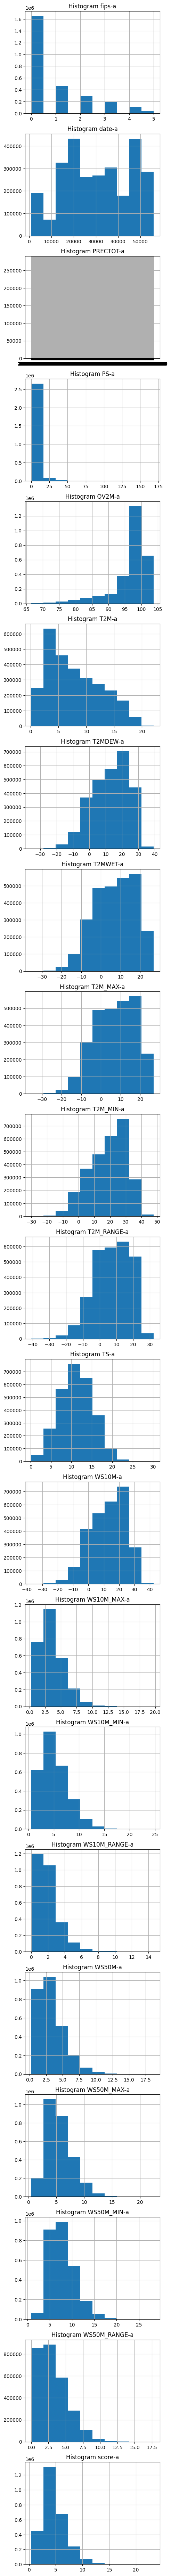

In [84]:
plt.figure(figsize = (5, 100))
# score nije balansiran
for x in range(1, 22):
    plt.subplot(22, 1, x)
    train_X[f'{x_name}'].hist()
    x_name = train_X.columns[x-1]
    plt.title(f'Histogram {x_name}-a')

In [85]:
# feature selection i feature extraction
# T2M_RANGE, WS10M_RANGE i WS50M_RANGE su redundantne i
# mogu da se izbace pošto imamo i max i min za ove vrednosti
train_X = train_X.drop('T2M_RANGE', axis = 1)
train_X = train_X.drop('WS10M_RANGE', axis = 1)
train_X = train_X.drop('WS50M_RANGE', axis = 1)

test_X = test_X.drop('T2M_RANGE', axis = 1)
test_X = test_X.drop('WS10M_RANGE', axis = 1)
test_X = test_X.drop('WS50M_RANGE', axis = 1)

valid_X = valid_X.drop('T2M_RANGE', axis = 1)
valid_X = valid_X.drop('WS10M_RANGE', axis = 1)
valid_X = valid_X.drop('WS50M_RANGE', axis = 1)

<Axes: >

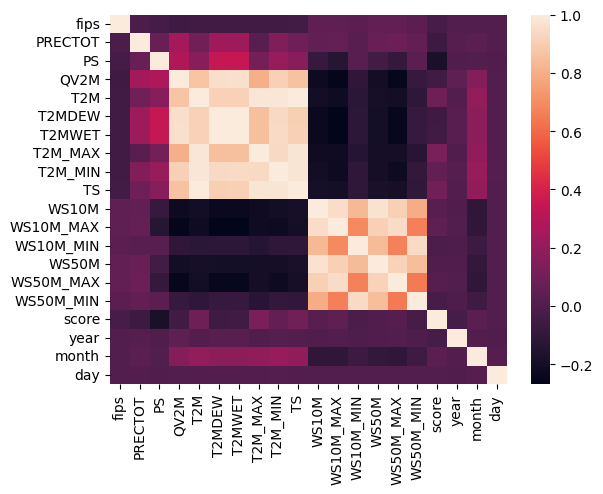

In [86]:
# korelacija
# pre korelacije treba pretvoriti datum u brojeve
train_X['year'] = pd.DatetimeIndex(train_X['date']).year
train_X['month'] = pd.DatetimeIndex(train_X['date']).month
train_X['day'] = pd.DatetimeIndex(train_X['date']).day
# i izbaciti date pošto postaje redundantan
train_X = train_X.drop('date', axis = 1)
# heatmapa
sns.heatmap(train_X.corr(numeric_only = True))

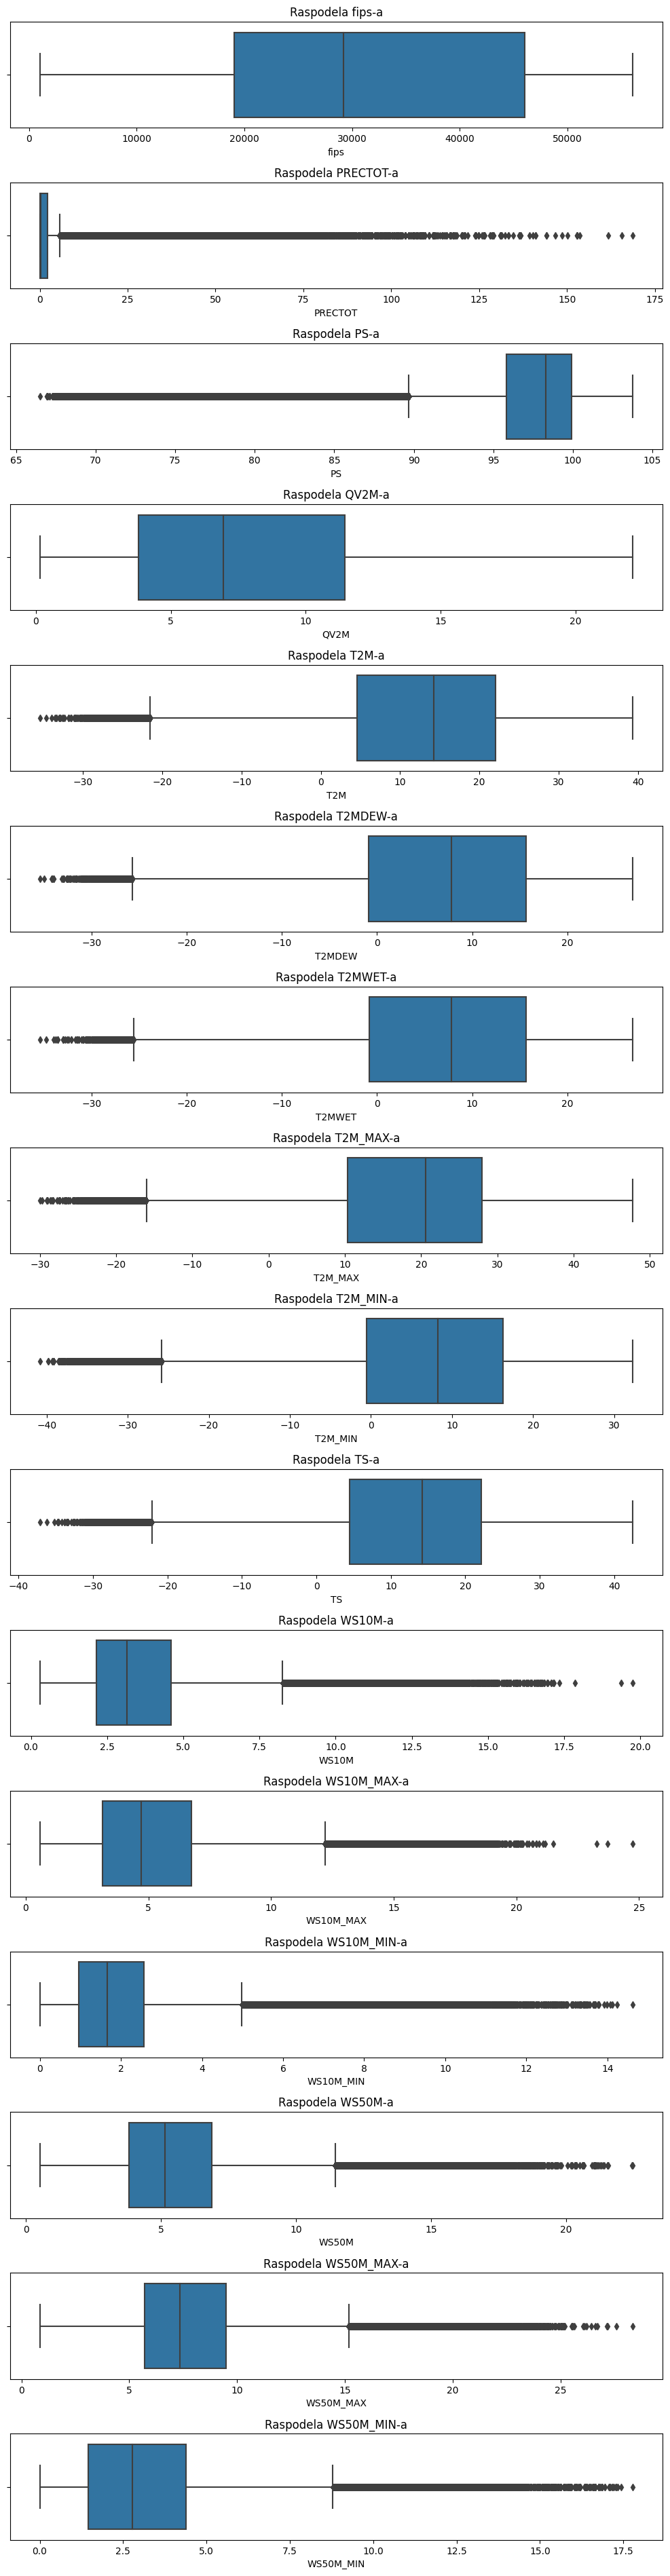

In [87]:
# outlier-i i šta raditi sa njima
# ne gledamo outlier-e za fips, dane, mesece, godine i score
plt.figure(figsize = (10, 40))
for x in range(1, 17):
    plt.subplot(17, 1, x)
    sns.boxplot(x = train_X.columns[x-1], data = train_X)
    x_name = train_X.columns[x-1]
    plt.title(f'Raspodela {x_name}-a')
plt.tight_layout()

In [88]:
# u dataset-u se nalazi mali broj outlier-a
for i in train_X.columns:
    if i == 'fips' or i == 'day' or i == 'month' or i == 'year' or i == 'score':
        continue
    print(f'Procenat elemenata van granica u {i}-u:')
    print(round(100*(len(train_X[(train_X[i] > train_X[i].mean() + 3 * train_X[i].std())])
         + len(train_X[(train_X[i] < train_X[i].mean() - 3 * train_X[i].std())]))/train_X.shape[0], 5), '%')

Procenat elemenata van granica u PRECTOT-u:
2.39165 %
Procenat elemenata van granica u PS-u:
2.65515 %
Procenat elemenata van granica u QV2M-u:
4e-05 %
Procenat elemenata van granica u T2M-u:
0.16436 %
Procenat elemenata van granica u T2MDEW-u:
0.07338 %
Procenat elemenata van granica u T2MWET-u:
0.0658 %
Procenat elemenata van granica u T2M_MAX-u:
0.12275 %
Procenat elemenata van granica u T2M_MIN-u:
0.25189 %
Procenat elemenata van granica u TS-u:
0.17274 %
Procenat elemenata van granica u WS10M-u:
1.08655 %
Procenat elemenata van granica u WS10M_MAX-u:
0.84834 %
Procenat elemenata van granica u WS10M_MIN-u:
1.44737 %
Procenat elemenata van granica u WS50M-u:
0.83757 %
Procenat elemenata van granica u WS50M_MAX-u:
0.94258 %
Procenat elemenata van granica u WS50M_MIN-u:
0.70985 %


In [89]:
# tako da možemo da ih izbacimo
for i in train_X.columns:
    if i == 'fips' or i == 'day' or i == 'month' or i == 'year' or i == 'score':
        continue
    train_X = (train_X[(train_X[f'{i}'] <= train_X[f'{i}'].mean() + 3 * train_X[f'{i}'].std())]
            + train_X[(train_X[f'{i}'] >= train_X[f'{i}'].mean() - 3 * train_X[f'{i}'].std())])
# provera da li smo dobro izbacili outlier-e
train_X.shape

(2524489, 20)

In [90]:
# balansiranje
# TODO: ako bude potrebno (a hoće)